In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from dask_jobqueue import PBSCluster

In [2]:
from utils import *

In [ ]:
#Set the file path
filepath='/glade/campaign/cgd/tss/projects/PPE/PPEn11_LHC/transient/hist/'

In [7]:
#Open multiple files as a single dataset
ds_mf =xr.open_mfdataset(['/glade/campaign/cgd/tss/projects/PPE/PPEn11_LHC/transient/hist/PPEn11_transient_LHC0001.clm2.h0.2005-02-01-00000.nc', 
                          '/glade/campaign/cgd/tss/projects/PPE/PPEn11_LHC/transient/hist/PPEn11_transient_LHC0002.clm2.h0.2005-02-01-00000.nc'], combine='nested',compat='override')

In [9]:
file = "/glade/campaign/cgd/tss/projects/PPE/PPEn11_LHC/transient/hist/PPEn11_transient_LHC0001.clm2.h0.2005-02-01-00000.nc"
ds = xr.open_dataset(file)

In [8]:
ds_mf.head()

<xarray.Dataset>
Dimensions:                            (levgrnd: 5, levsoi: 5, levlak: 5,
                                        levdcmp: 5, time: 5, hist_interval: 2,
                                        lon: 5, lat: 5, gridcell: 5,
                                        landunit: 5, column: 5, pft: 5, cft: 2,
                                        ltype: 5, nvegwcs: 4)
Coordinates:
  * levgrnd                            (levgrnd) float32 0.01 0.04 ... 0.16 0.26
  * levsoi                             (levsoi) float32 0.01 0.04 0.09 0.16 0.26
  * levlak                             (levlak) float32 0.05 0.6 2.1 4.6 8.1
  * levdcmp                            (levdcmp) float32 0.01 0.04 ... 0.16 0.26
  * time                               (time) object 2005-02-01 00:00:00 ... ...
  * lon                                (lon) float32 0.0 2.5 5.0 7.5 10.0
  * lat                                (lat) float32 -90.0 -88.11 ... -82.42
Dimensions without coordinates: hist_interval, gridcell, landunit, column, pft,
                                cft, ltype, nvegwcs
Data variables: (12/497)
    mcdate                             (time) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    mcsec                              (time) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    mdcur                              (time) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    mscur                              (time) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    nstep                              (time) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    time_bounds                        (time, hist_interval) object dask.array<chunksize=(5, 2), meta=np.ndarray>
    ...                                 ...
    XSMRPOOL                           (time, gridcell) float32 dask.array<chunksize=(5, 5), meta=np.ndarray>
    XSMRPOOL_RECOVER                   (time, gridcell) float32 dask.array<chunksize=(5, 5), meta=np.ndarray>
    ZBOT                               (time, gridcell) float32 dask.array<chunksize=(5, 5), meta=np.ndarray>
    ZWT                                (time, gridcell) float32 dask.array<chunksize=(5, 5), meta=np.ndarray>
    ZWT_CH4_UNSAT                      (time, gridcell) float32 dask.array<chunksize=(5, 5), meta=np.ndarray>
    ZWT_PERCH                          (time, gridcell) float32 dask.array<chunksize=(5, 5), meta=np.ndarray>
Attributes: (12/40)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 08/10/23 00:09:45
    source:                                    Community Terrestrial Systems ...
    hostname:                                  cheyenne
    ...                                        ...
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          month_1
    Time_constant_3Dvars_filename:             ./PPEn11_transient_LHC0001.clm...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

In [10]:
ds.head()

<xarray.Dataset>
Dimensions:                            (levgrnd: 5, levsoi: 5, levlak: 5,
                                        levdcmp: 5, time: 5, hist_interval: 2,
                                        lon: 5, lat: 5, gridcell: 5,
                                        landunit: 5, column: 5, pft: 5, cft: 2,
                                        ltype: 5, nvegwcs: 4)
Coordinates:
  * levgrnd                            (levgrnd) float32 0.01 0.04 ... 0.16 0.26
  * levsoi                             (levsoi) float32 0.01 0.04 0.09 0.16 0.26
  * levlak                             (levlak) float32 0.05 0.6 2.1 4.6 8.1
  * levdcmp                            (levdcmp) float32 0.01 0.04 ... 0.16 0.26
  * time                               (time) object 2005-02-01 00:00:00 ... ...
  * lon                                (lon) float32 0.0 2.5 5.0 7.5 10.0
  * lat                                (lat) float32 -90.0 -88.11 ... -82.42
Dimensions without coordinates: hist_interval, gridcell, landunit, column, pft,
                                cft, ltype, nvegwcs
Data variables: (12/497)
    mcdate                             (time) int32 ...
    mcsec                              (time) int32 ...
    mdcur                              (time) int32 ...
    mscur                              (time) int32 ...
    nstep                              (time) int32 ...
    time_bounds                        (time, hist_interval) object ...
    ...                                 ...
    XSMRPOOL                           (time, gridcell) float32 ...
    XSMRPOOL_RECOVER                   (time, gridcell) float32 ...
    ZBOT                               (time, gridcell) float32 ...
    ZWT                                (time, gridcell) float32 ...
    ZWT_CH4_UNSAT                      (time, gridcell) float32 ...
    ZWT_PERCH                          (time, gridcell) float32 ...
Attributes: (12/40)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 08/10/23 00:09:45
    source:                                    Community Terrestrial Systems ...
    hostname:                                  cheyenne
    ...                                        ...
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          month_1
    Time_constant_3Dvars_filename:             ./PPEn11_transient_LHC0001.clm...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

In [7]:
lnc = ds['LNC']
lnc_timeavg = lnc.mean(dim = 'time')

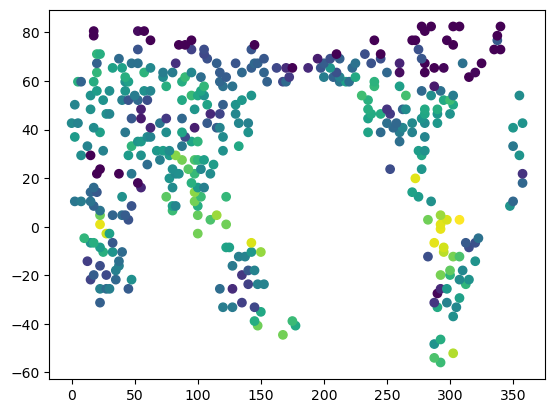

In [10]:
plt.scatter(ds.grid1d_lon,
            ds.grid1d_lat,
            c=lnc_timeavg)

In [11]:
lnc_avg = lnc_timeavg.mean(dim = 'lat')

ValueError: 'lat' not found in array dimensions ('gridcell',)